## What are ANNs?

![alt text](https://cdn-images-1.medium.com/max/1200/1*-teDpAIho_nzNShRswkfrQ.gif)

An ANN is made of many interconnected "**neurons**".   

Each neuron takes in some floating point numbers (e.g. 1.0, 0.5, -1.0) and multiplies them by some other floating point numbers (e.g. 0.7, 0.6, 1.4) known as **weights** (1.0 * 0.7 = 0.7, 0.5 * 0.6 = 0.3, -1.0 * 1.4 = -1.4).  The weights act as a mechanism to focus on, or ignore, certain inputs.  The weighted inputs then get summed together (e.g. 0.7 + 0.3 + -1.4 = -0.4) along with a **bias** value (e.g. -0.4 + ** -0.1 ** = -0.5).  

The summed value (x) is now transformed into an output value (y) according to the neuron's **activation function**  (y = **f**(x)).  Some popular activation functions are shown below: 

![alt text](https://cdn-images-1.medium.com/max/1600/1*RD0lIYqB5L2LrI2VTIZqGw.png)

e.g. -0.5 --> -0.05 if we use the **Leaky Rectified Linear Unit (Leaky ReLU)** activation function: y = f(x) = f(-0.5) = max(0.1*-0.5, -0.5) = max(-0.05, -0.5) = -0.05

In larger ANNs with many layers, the neuron's output value (e.g. -0.05) would become the input for another neuron.

![alt text](https://www.16bit.ai/static/img/loading.gif)

![alt text](https://www.neuraldesigner.com/images/deep_neural_network.png)

However, one of the first ANNs was known as the perceptron and it consisted of only a single neuron.  

![alt text](https://cdn-images-1.medium.com/max/1600/1*_Zy1C83cnmYUdETCeQrOgA.png)

The output of the perceptron's neuron acts as the final prediction. 

![alt text](https://cdn-images-1.medium.com/fit/t/1600/480/1*gpH4JC6Dqx_hIjrrcrq1Og.gif)

This means that each neuron is a linear binary classifier all on its own (e.g. an output value >= 0 would be the blue class, but an output value < 0 would be the red class)



## **Data Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.jpijnswnnan3ce6lli5fwsphut2vxmth.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


In [ ]:
dataset=pd.read_csv(r"D:\Churn_Modelling.csv")

In [ ]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset["CustomerId"].nunique()#All customers are unique

10000

In [ ]:
dataset.shape

(10000, 14)

### Missing Values

In [ ]:
dataset.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [ ]:
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset.drop(["RowNumber","CustomerId","Surname"], axis = 1, inplace = True)

In [ ]:
dataset

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
dataset["Geography"].unique()#Nominal

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
dataset["Gender"].unique()#Nominal

array(['Female', 'Male'], dtype=object)

### One Hot Encoding

In [ ]:
dataset = pd.get_dummies(dataset,columns=["Geography","Gender"],drop_first=True)

In [ ]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
dataset.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

#### Split the Independent and Dependent variables

In [ ]:
dataset.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0


In [ ]:
#Independent variables
x = dataset.drop("Exited",axis = 1)

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
x.shape

(10000, 11)

In [ ]:
y = dataset["Exited"]

In [ ]:
y.shape

(10000,)

In [ ]:
x.shape

(10000, 11)

### Split the data into train and test set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#20% --Test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 42)

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


In [ ]:
x_train.shape

(8000, 11)

In [ ]:
x_test.shape

(2000, 11)

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,0,0,1
1561,632,42,4,119624.60,2,1,1,195978.86,1,0,1
1670,559,24,3,114739.92,1,1,0,85891.02,0,1,1
6087,561,27,9,135637.00,1,1,0,153080.40,0,0,0
6669,517,56,9,142147.32,1,0,0,39488.04,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5734,768,54,8,69712.74,1,1,1,69381.05,0,0,1
5191,682,58,1,0.00,1,1,1,706.50,0,0,0
5390,735,38,1,0.00,3,0,0,92220.12,0,0,0
860,667,43,8,190227.46,1,1,0,97508.04,0,0,1


### Scaling or Standardization or Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()#Creatin the object

In [ ]:
#fit -- To apply the formula
#transform -- 
x_train = sc.fit_transform(x_train)

In [ ]:
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [ ]:
x_test

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# **Build the Neural network model**

So why do we need so many neurons in an ANN if one will suffice?  Well, individual neurons are unable to classify non-linearly separable data because they can only ever learn a linear decision boundary. 

![alt text](https://jtsulliv.github.io/images/perceptron/linsep_new.png?raw=True)

However, by combining neurons together, we essentially combine their decision boundaries.  Therefore, an ANN composed of many neurons is able to learn non-linear decision boundaries.

![alt text](https://i.ytimg.com/vi/BR9h47Jtqyw/maxresdefault.jpg)

Neurons are connected together according to a specific network architecture.  Though there are different architectures, nearly all of them contain **layers**.  (Neurons in the same layer do not connect with one another.)



![alt text](https://cdn-images-1.medium.com/max/1600/1*_M4bZyuwaGby6KMiYVYXvg.jpeg)

There is typically an input layer (containing a number of neurons equal to the number of input features in the data), an output layer (containing a number of neurons equal to the number of classes) and a hidden layer (containing any number of neurons).  There can be more than one hidden layer  to allow the neural net to learn more complex decision boundaries (Any neural net with more than one hidden layer is considered a deep neural net).
 
 ![alt text](https://www.stoodnt.com/blog/wp-content/uploads/2018/03/Neural-Networks.png)


##### Build the Architechture

In [ ]:
# Tensorflow -- Google Neural networks
# Tensorflow. Keras
# Pytorch --Facebook

In [ ]:
!pip install tensorflow==2.3.0

  Using cached scipy-1.4.1-cp37-cp37m-win_amd64.whl (30.9 MB)
  Using cached numpy-1.18.5-cp37-cp37m-win_amd64.whl (12.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\numpy-1.21.5.dist-info\\entry_points.txt'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\programdata\anaconda3\python.exe -m pip install --upgrade pip' command.


In [ ]:
from tensorflow.keras.models import Sequential #Used to init the NN Model

In [ ]:
from tensorflow.keras.layers import Dense #Used for adding layers

### Init the Neural Network Model

In [ ]:
nn_model = Sequential()

### Add a input layer

In [ ]:
x_train.shape[1]#No of features

11

In [ ]:
#add -- Add the layers to the model
#add(layer)
#input_dim -- No Of features no of neurons in input layer
#kernel_initializer -- Strategy to init the weights #kernel--weights
#activation -- function to be applied in this layer
#output_dim --units -- No of outputs from each neuron -- or No of neurons
    #in next layer -- Hyperparameter
inp_layer = Dense(input_dim = x_train.shape[1], 
                  kernel_initializer = "random_uniform", 
                  activation = "relu", units = 30 )
nn_model.add(inp_layer)

### Add the hidden layer

Once we initialize our ann, we are now going to create layers for the same. Here we are going to create a network that will have 2 hidden layers, 1 input layer, and 1 output layer.

In [ ]:
hidden_layer = Dense(kernel_initializer = "random_uniform", 
                  activation = "relu", units = 35 )
nn_model.add(hidden_layer)

Here we have created our first hidden layer by using the Dense class which is part of the layers module. This class accepts 2 inputs:-

1. units:- number of neurons that will be present in the respective layer

2. activation:- specify which activation function to be used

“relu”[rectified linear unit] as an activation function for hidden layers. Since we are going to create two hidden layers, this same step we are going to repeat for the creation of the second hidden layer as well.

### Add Hidder layer -2

In [ ]:
hidden_layer_2 = Dense(kernel_initializer = "random_uniform", 
                  activation = "relu", units = 20 )
nn_model.add(hidden_layer_2)

### Add the output layer

In this step, we are going to create our output layer for ann. The output layer will be responsible for giving output.

In [ ]:
#The final layer which return the output  -- output_layer
#Sigmoid 
output_layer = Dense(kernel_initializer = "random_uniform", 
                  activation = "sigmoid", units = 1 )
nn_model.add(output_layer)

Here again, we are going to use the Dense class in order to create the output layer. Two important things to remember here:-

1. In a binary classification problem(like this one) where we will be having only two classes as output (1 and 0), we will be allocating only one neuron to output this result. For the multiclass classification problem, we have to use more than one neuron in the output layer. For example – if our output contains 4 categories then we need to create 4 different neurons[one for each category].

2. For the binary classification Problems, the activation function that should always be used is sigmoid. For a multiclass classification problem, the activation function that should be used is softmax.

Here since we are dealing with binary classification hence we are allocating only one neuron in the output layer and the activation function which is used is softmax.

### Compile the model

We have now created layers for our neural network. In this step, we are going to compile our ANN.

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
#learning_rate --decides the speed of learning process
ada_optimizer = Adam(learning_rate=0.001)#0.001

We have used compile method of our ann object in order to compile our network. Compile method accepts the below inputs:-

1. optimizer:- specifies which optimizer to be used in order to perform stochastic gradient descent. I had experimented with various optimizers like RMSProp, adam and I have found that adam optimizer is a reliable one that can be used with any neural network.

2. loss:- specifies which loss function should be used. For binary classification, the value should be binary_crossentropy. For multiclass classification, it should be categorical_crossentropy.

3. metrics:- which performance metrics to be used in order to compute performance. Here we have used accuracy as a performance metric.

In [ ]:
#Here the strategies are mentioned
#loss -- Error calculating strategy
#optimizer --Optimizing the weights -- Weights updating strategy
#adam -- mini batch gradient descent
#metrics--model performace calculating strategy

nn_model.compile(loss = "binary_crossentropy", optimizer = ada_optimizer, metrics = ["accuracy"])

In [ ]:
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                360       
_________________________________________________________________
dense_13 (Dense)             (None, 35)                1085      
_________________________________________________________________
dense_14 (Dense)             (None, 20)                720       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 21        
Total params: 2,186
Trainable params: 2,186
Non-trainable params: 0
_________________________________________________________________


### Train the model

This is the last step in our ann creation process. Here we are just going to train our ann on the training dataset.

Here we have used the fit method in order to train our ann. The fit method is accepting 4 inputs in this case:-

1.X_train:- Matrix of features for the training dataset

2.Y_train:- Dependent variable vectors for the training dataset

3.batch_size: how many observations should be there in the batch. Usually, the value for this parameter is 32 but we can experiment with any other value as well.

4.epochs: How many times neural networks will be trained. Here the optimal value is 100.

Are you interested to see how the training process looks like? Well here is the snap for the same.

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
# no of training points / batch_size

In [ ]:
#Training data
#batch_size -- No of data points for used for weights updation(Hyperparameter)
#Epochs--No of training iterations
training_stats = nn_model.fit(x_train, y_train, batch_size = 32, epochs = 200)

Epoch 1/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4971 - accuracy: 0.7930
Epoch 2/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.7945
Epoch 3/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4226 - accuracy: 0.8016
Epoch 4/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.8238
Epoch 5/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.8281
Epoch 6/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8304
Epoch 7/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.8328
Epoch 8/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8317
Epoch 9/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8338
Epoch 10/200
250/250 [==============================] - 0s 1ms/step - loss: 0.4121 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8670
Epoch 82/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3214 - accuracy: 0.8659
Epoch 83/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8669
Epoch 84/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8651
Epoch 85/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3203 - accuracy: 0.8654
Epoch 86/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3208 - accuracy: 0.8684
Epoch 87/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3195 - accuracy: 0.8650
Epoch 88/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8652
Epoch 89/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3199 - accuracy: 0.8637
Epoch 90/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3187 - accuracy: 

250/250 [==============================] - 0s 988us/step - loss: 0.3035 - accuracy: 0.8720
Epoch 161/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.8712
Epoch 162/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.8727
Epoch 163/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3035 - accuracy: 0.8711
Epoch 164/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3021 - accuracy: 0.8734
Epoch 165/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3020 - accuracy: 0.8758
Epoch 166/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8724
Epoch 167/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3047 - accuracy: 0.8724
Epoch 168/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3019 - accuracy: 0.8712
Epoch 169/200
250/250 [==============================] - 0s 1ms/step - loss: 0.3017 -

In [ ]:
training_stats

In [ ]:
training_stats.history

{'loss': [0.49714395403862,
  0.4278409779071808,
  0.4226222634315491,
  0.4208059012889862,
  0.418792188167572,
  0.4165421724319458,
  0.41665273904800415,
  0.4146137535572052,
  0.41317856311798096,
  0.4121111035346985,
  0.4104393422603607,
  0.40757542848587036,
  0.39188268780708313,
  0.37948620319366455,
  0.3729284405708313,
  0.36804160475730896,
  0.3637401759624481,
  0.36161619424819946,
  0.35753878951072693,
  0.3579087257385254,
  0.3546876311302185,
  0.35290974378585815,
  0.3520805835723877,
  0.3523266613483429,
  0.3492955267429352,
  0.34741151332855225,
  0.3469253182411194,
  0.3455953299999237,
  0.3438141942024231,
  0.34152647852897644,
  0.3396671414375305,
  0.3386046588420868,
  0.33708614110946655,
  0.335731565952301,
  0.33628571033477783,
  0.3354997932910919,
  0.3339729309082031,
  0.3342808187007904,
  0.33302628993988037,
  0.33214324712753296,
  0.3329569697380066,
  0.3333316445350647,
  0.3315681517124176,
  0.3324357569217682,
  0.329711019

In [ ]:
epochs = list(range(1,201))

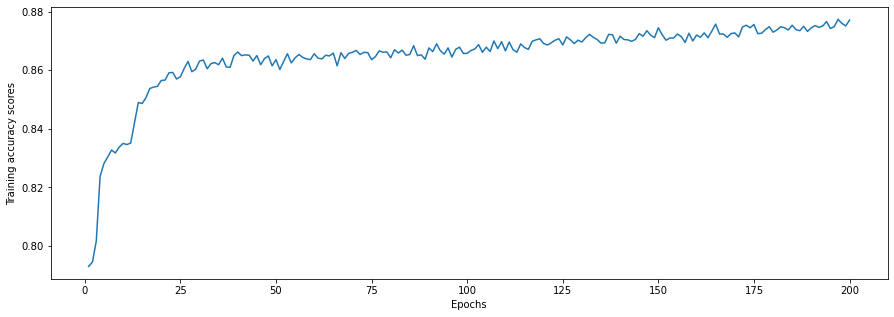

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(epochs, training_stats.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Training accuracy scores")

plt.show()

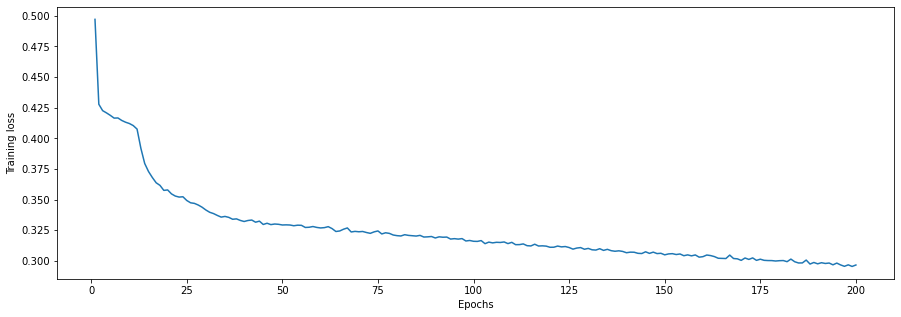

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(epochs, training_stats.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Training loss")

plt.show()

### Prediction

In [ ]:
y_pred_prob = nn_model.predict(x_test)

In [ ]:
y_pred_prob

array([[0.04529426],
       [0.01198703],
       [0.11762998],
       ...,
       [0.6304898 ],
       [0.18124652],
       [0.4753833 ]], dtype=float32)

In [ ]:
y_pred_prob > 0.5

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [ ]:
y_pred = nn_model.predict_classes(x_test)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [ ]:
y_test

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
print("Test Accuracy score::",accuracy_score(y_test,y_pred))

Test Accuracy score:: 0.861


In [ ]:
confusion_matrix(y_test,y_pred)

array([[1524,   83],
       [ 195,  198]], dtype=int64)

In [ ]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20d4c522988>)

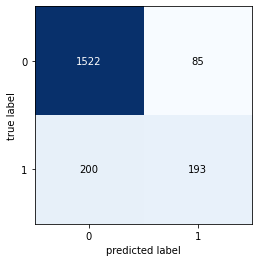

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

### Real time prediction

In [ ]:
customer_data = list(x.iloc[200,:])

In [ ]:
customer_data 


[850.0, 30.0, 2.0, 141040.01, 1.0, 1.0, 1.0, 5978.2, 0.0, 1.0, 1.0]

In [ ]:
customer_data = np.array([customer_data])

In [ ]:
customer_data

array([[8.5000000e+02, 3.0000000e+01, 2.0000000e+00, 1.4104001e+05,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 5.9782000e+03,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00]])

In [ ]:
customer_data = sc.transform(customer_data)

In [ ]:
customer_data

array([[ 2.0584476 , -0.84593077, -1.04241787,  1.03971956, -0.91668767,
         0.64920267,  0.97481699, -1.64222473, -0.57946723,  1.73494238,
         0.91324755]])

In [ ]:
nn_model.predict(customer_data)

array([[0.02705321]], dtype=float32)

### Save NN Model

In [ ]:
nn_model.save("customer_churn.h5")

### Save the scaler object

In [ ]:
import joblib

In [ ]:
joblib.dump(sc,"scaler_churn.pkl")

['scaler_churn.pkl']